# Unsupervised Learning

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## KMeans

[Link to Code Reference](https://github.com/madhug-nadig/Machine-Learning-Algorithms-from-Scratch/blob/master/K%20Means%20Clustering.py)

In [17]:
class K_Means():
    """
    KMeans Algorithm
    """
    def __init__(self, k = 3, max_iterations = 500, tolerance = 0.0001):
        self.k = k
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        
    
    def fit(self, data):
        """
        Fit the data
        """
        self.centroids = {}
        
        # initialize the centroids
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        # start iteration
        for i in range(self.max_iterations):
            self.classes = {}
            
            for i in range(self.k):
                self.classes[i] = []
                
            # find the distance between point and cluster. Choose nearest centroid
            for datum in data:
                distances = [np.linalg.norm(datum - self.centroids[centroid]) for centroid in self.centroids]
                get_index = distances.index(min(distances)) # get index
                self.classes[get_index].append(datum)
                
            previous = dict(self.centroids)
            
            # average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)
                
            isOptimal = True # flag to check if optimal; compare with tolerance
            
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                
                if np.sum((curr - original_centroid)/original_centroid * 100) > self.tolerance:
                    isOptimal = False

            # break if results are optimal.
            if isOptimal:
                break
    
    def predict(self, data):
        """
        Predict clusters
        """
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification - distances.index(min(distances))
        
        return classification

In [18]:
full_data = pd.read_csv('data/datasets_180_408_data.csv')
kmeans_data = full_data[['radius_mean', 'texture_mean']].values.tolist()
X = full_data[['radius_mean', 'texture_mean']].values

km = K_Means(3)
km.fit(X)

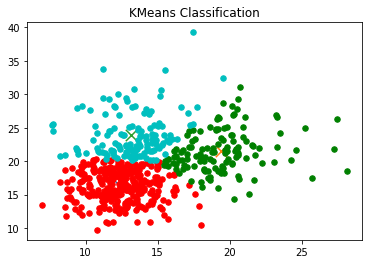

In [24]:
colors = 10*["r", "g", "c", "b", "k"]

for centroid in km.centroids:
    plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

for classification in km.classes:
    color = colors[classification]
    for features in km.classes[classification]:
        plt.scatter(features[0], features[1], color = color,s = 30)

plt.title('KMeans Classification')
plt.show()